## UK Protected Area Analysis: SSSI Condition
### This notebook retrieves data from the NE Open data site to asses SSSI condition in English National Parks and AONBs
<font color=red>Note this notebook started out as an AGOL notebook but is now a Pro notebook as worflow is improved haivng it in Pro</font>
#### author: Adrian Hughes RSPB


#### Sign into AGOL  and set basic parameters

In [1]:
from arcgis.gis import GIS
gis = GIS("Pro")
import pandas as pd
# Use 0 decimal places in output display
#pd.set_option("display.precision", 0)
from arcgis.features import SpatialDataFrame


import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
def table_to_data_frame(in_table, input_fields=None, where_clause=None):
    """Function will convert an arcgis table into a pandas dataframe with an object ID index, and the selected
    input fields using an arcpy.da.SearchCursor."""
    OIDFieldName = arcpy.Describe(in_table).OIDFieldName
    if input_fields:
        final_fields = [OIDFieldName] + input_fields
    else:
        final_fields = [field.name for field in arcpy.ListFields(in_table)]
    data = [row for row in arcpy.da.SearchCursor(in_table, final_fields, where_clause=where_clause)]
    fc_dataframe = pd.DataFrame(data, columns=final_fields)
    fc_dataframe = fc_dataframe.set_index(OIDFieldName, drop=True)
    return fc_dataframe

#### Load Data from NE Portal

<Item title:"Sites of Special Scientific Interest Units (England)" type:Feature Layer Collection owner:Opendata_NE>
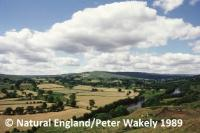

In [3]:
# Item Added From Toolbar
# Title: Sites of Special Scientific Interest Units (England) | Type: Feature Service | Owner: Opendata_NE
sssi = gis.content.get("03fd7a2f8e4e4346bf41ce7879153949")
sssi

In [ ]:
# Item Added From Toolbar
# Title: Areas of Outstanding Natural Beauty (England) | Type: Feature Service | Owner: Opendata_NE
aonb = gis.content.get("6f2ad07d91304ad79cdecd52489d5046")
aonb

In [51]:
arcpy.analysis.SummarizeWithin("Westminster_Constituencies_England", "Sites of Special Scientific Interest Condition Units (SSSI) England © Natural England", r"S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\Eng_SSSI_Condition_Constit", "KEEP_ALL", None, "ADD_SHAPE_SUM", "SQUAREKILOMETERS", "CONDITION", "NO_MIN_MAJ", "ADD_PERCENT", r"S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\Eng_Constit_SSSI_CONDITION_Summary")

In [52]:
from arcgis import features
#line below will consume credits
#features.summarize_data.summarize_within(aonb,sssi, group_by_field='Condition',shape_units='SquareKilometers',percent_shape=True,output_name = 'aonb_sssi_summary')

<Item title:"aonb_sssi_summary" type:Feature Layer Collection owner:Adrian.Hughes@rspb.org.uk_RSPB>
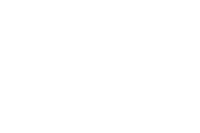

In [15]:
# Item Added From Toolbar
# Title: aonb_sssi_summary | Type: Feature Service | Owner: Adrian.Hughes@rspb.org.uk_RSPB
item = gis.content.get("8609ce0ca4d14c69927446b9e3ef0615")
item

In [55]:
from arcgis.features import SpatialDataFrame
flayer = item.layers[0]
sdf = SpatialDataFrame.from_layer(flayer)
sdf.head()


,OBJECTID,CODE,NAME,DESIG_DATE,HOTLINK,STAT_AREA,Shape__Area,Shape__Length,SUM_Area_SquareKilometers,Join_ID,AnalysisArea,SHAPE
0,1,1,Arnside & Silverdale,Dec-72,http://www.landscapesforlife.org.uk/about-aonb...,76,8e+07,38440,40,1,76,"{'rings': [[[342779.243, 477984.747500001], [3..."
1,2,2,Blackdown Hills,Jun-91,http://www.landscapesforlife.org.uk/about-aonb...,370,4e+08,105456,6,2,370,"{'rings': [[[316389.7789, 99529.2292999998], [..."
2,3,3,Cannock Chase,Sep-58,http://www.landscapesforlife.org.uk/about-aonb...,69,7e+07,63833,14,3,69,"{'rings': [[[402748.656, 318916.0605], [402753..."
3,4,4,Chichester Harbour,Feb-64,http://www.landscapesforlife.org.uk/about-aonb...,73,7e+07,51608,36,4,73,"{'rings': [[[472850.0041, 99130.1035999991], [..."
4,5,5,Chilterns,Mar-90,http://www.landscapesforlife.org.uk/about-aonb...,838,8e+08,420251,32,5,839,"{'rings': [[[460107.592, 185487.7039], [460107..."


In [56]:
table = item.tables[0]
df = SpatialDataFrame.from_layer(table)
df.head()

,Join_ID,CONDITION,SUM_Area_SquareKilometers,PercentArea
0,1,FAVOURABLE,3e+01,3e+01
1,1,UNFAVOURABLE DECLINING,9e+00,1e+01
2,1,UNFAVOURABLE NO CHANGE,3e-01,4e-01
3,1,UNFAVOURABLE RECOVERING,5e+00,7e+00
4,2,FAVOURABLE,1e+00,3e-01


In [57]:

aonb_condition = pd.merge(df,sdf,on='Join_ID')
aonb_condition.head()

,Join_ID,CONDITION,SUM_Area_SquareKilometers_x,PercentArea,OBJECTID,CODE,NAME,DESIG_DATE,HOTLINK,STAT_AREA,Shape__Area,Shape__Length,SUM_Area_SquareKilometers_y,AnalysisArea,SHAPE
0,1,FAVOURABLE,3e+01,3e+01,1,1,Arnside & Silverdale,Dec-72,http://www.landscapesforlife.org.uk/about-aonb...,76,8e+07,38440,40,76,"{'rings': [[[342779.243, 477984.747500001], [3..."
1,1,UNFAVOURABLE DECLINING,9e+00,1e+01,1,1,Arnside & Silverdale,Dec-72,http://www.landscapesforlife.org.uk/about-aonb...,76,8e+07,38440,40,76,"{'rings': [[[342779.243, 477984.747500001], [3..."
2,1,UNFAVOURABLE NO CHANGE,3e-01,4e-01,1,1,Arnside & Silverdale,Dec-72,http://www.landscapesforlife.org.uk/about-aonb...,76,8e+07,38440,40,76,"{'rings': [[[342779.243, 477984.747500001], [3..."
3,1,UNFAVOURABLE RECOVERING,5e+00,7e+00,1,1,Arnside & Silverdale,Dec-72,http://www.landscapesforlife.org.uk/about-aonb...,76,8e+07,38440,40,76,"{'rings': [[[342779.243, 477984.747500001], [3..."
4,2,FAVOURABLE,1e+00,3e-01,2,2,Blackdown Hills,Jun-91,http://www.landscapesforlife.org.uk/about-aonb...,370,4e+08,105456,6,370,"{'rings': [[[316389.7789, 99529.2292999998], [..."


In [58]:
cols = aonb_condition.columns.tolist()
cols

['Join_ID',
 'CONDITION',
 'SUM_Area_SquareKilometers_x',
 'PercentArea',
 'OBJECTID',
 'CODE',
 'NAME',
 'DESIG_DATE',
 'HOTLINK',
 'STAT_AREA',
 'Shape__Area',
 'Shape__Length',
 'SUM_Area_SquareKilometers_y',
 'AnalysisArea',
 'SHAPE']

In [59]:
aonb_condition['% Condition'] = (aonb_condition['SUM_Area_SquareKilometers_x'] / aonb_condition['SUM_Area_SquareKilometers_y']*100)
aonb_condition['Area Ha'] = (aonb_condition['SUM_Area_SquareKilometers_x'] *100)
aonb_condition[['NAME', 'CONDITION','SUM_Area_SquareKilometers_x','SUM_Area_SquareKilometers_y','Area Ha','% Condition']]


,NAME,CONDITION,SUM_Area_SquareKilometers_x,SUM_Area_SquareKilometers_y,Area Ha,% Condition
0,Arnside & Silverdale,FAVOURABLE,3e+01,40,2616,6e+01
1,Arnside & Silverdale,UNFAVOURABLE DECLINING,9e+00,40,852,2e+01
2,Arnside & Silverdale,UNFAVOURABLE NO CHANGE,3e-01,40,28,7e-01
3,Arnside & Silverdale,UNFAVOURABLE RECOVERING,5e+00,40,550,1e+01
4,Blackdown Hills,FAVOURABLE,1e+00,6,122,2e+01
...,...,...,...,...,...,...
134,Tamar Valley,UNFAVOURABLE RECOVERING,8e-01,20,78,4e+00
135,Wye Valley,FAVOURABLE,9e+00,16,896,5e+01
136,Wye Valley,UNFAVOURABLE DECLINING,5e-01,16,54,3e+00
137,Wye Valley,UNFAVOURABLE NO CHANGE,4e-01,16,43,3e+00


In [60]:
aonb_fav = aonb_condition.query('CONDITION == "FAVOURABLE"')
aonb_fav = aonb_fav.rename(columns = {'% Condition': '% Favourable'}, inplace = False)
aonb_fav_final = aonb_fav[['NAME','Area Ha','% Favourable']]
aonb_fav_final

,NAME,Area Ha,% Favourable
0,Arnside & Silverdale,2616,65
4,Blackdown Hills,122,19
7,Cannock Chase,17,1
11,Chichester Harbour,253,7
15,Chilterns,2232,69
20,Cornwall,6370,50
25,Cotswolds,2388,58
30,Cranborne Chase & West Wiltshire Downs,1583,46
34,Dedham Vale,65,47
37,Dorset,7193,58


In [61]:
Total_AONB_fav =aonb_fav["Area Ha"].sum()

print(Total_AONB_fav)

85712.95302400002


In [62]:
aonb_condition.groupby( ["CONDITION"], as_index=False)['Area Ha'].sum()

,CONDITION,Area Ha
0,,196
1,DESTROYED,9
2,FAVOURABLE,85713
3,PART DESTROYED,27
4,UNFAVOURABLE DECLINING,11711
5,UNFAVOURABLE NO CHANGE,6558
6,UNFAVOURABLE RECOVERING,153146


In [63]:
aonb_unfav = aonb_condition.query('CONDITION.str.contains("UNFAVOURABLE")', engine='python')
aonb_unfav = aonb_unfav.rename(columns = {'% Condition': '% Unfavourable'}, inplace = False)
aonb_unfav[['NAME', 'CONDITION','Area Ha','% Unfavourable']]

,NAME,CONDITION,Area Ha,% Unfavourable
1,Arnside & Silverdale,UNFAVOURABLE DECLINING,852,2e+01
2,Arnside & Silverdale,UNFAVOURABLE NO CHANGE,28,7e-01
3,Arnside & Silverdale,UNFAVOURABLE RECOVERING,550,1e+01
5,Blackdown Hills,UNFAVOURABLE NO CHANGE,40,6e+00
6,Blackdown Hills,UNFAVOURABLE RECOVERING,477,7e+01
...,...,...,...,...
133,Tamar Valley,UNFAVOURABLE DECLINING,29,1e+00
134,Tamar Valley,UNFAVOURABLE RECOVERING,78,4e+00
136,Wye Valley,UNFAVOURABLE DECLINING,54,3e+00
137,Wye Valley,UNFAVOURABLE NO CHANGE,43,3e+00


In [64]:
aonb_unfav_final = aonb_unfav.groupby("NAME", as_index=False)["Area Ha","% Unfavourable"].sum()
aonb_unfav_final

,NAME,Area Ha,% Unfavourable
0,Arnside & Silverdale,1429,35
1,Blackdown Hills,517,81
2,Cannock Chase,1377,99
3,Chichester Harbour,3371,93
4,Chilterns,981,31
5,Cornwall,6056,48
6,Cotswolds,1735,42
7,Cranborne Chase & West Wiltshire Downs,1832,54
8,Dedham Vale,73,53
9,Dorset,5169,42


In [65]:
aonb_final = pd.merge(aonb_fav_final,aonb_unfav_final,on='NAME')
aonb_final.loc['Total'] = aonb_final.sum(numeric_only=True, axis=0)
aonb_final

,NAME,Area Ha_x,% Favourable,Area Ha_y,% Unfavourable
0,Arnside & Silverdale,2616,65,1429,35
1,Blackdown Hills,122,19,517,81
2,Cannock Chase,17,1,1377,99
3,Chichester Harbour,253,7,3371,93
4,Chilterns,2232,69,981,31
5,Cornwall,6370,50,6056,48
6,Cotswolds,2388,58,1735,42
7,Cranborne Chase & West Wiltshire Downs,1583,46,1832,54
8,Dedham Vale,65,47,73,53
9,Dorset,7193,58,5169,42


In [66]:
workspace = "/arcgis/home/"
file_path= f'{workspace}/anob_final.csv'
aonb_final.to_csv(file_path) 

In [67]:

Total_AONB_unfav =aonb_unfav_final["Area Ha"].sum()

print(Total_AONB_unfav)

171416.041459


### National Parks

<Item title:"National Parks (England)" type:Feature Layer Collection owner:Opendata_NE>
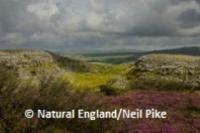

In [68]:
# Item Added From Toolbar
# Title: National Parks (England) | Type: Feature Service | Owner: Opendata_NE
np = gis.content.get("d333c7529754444894e2d7f5044d1bbf")
np

In [69]:
from arcgis import features
#line below will consume credits
#features.summarize_data.summarize_within(np,sssi, group_by_field='Condition',shape_units='SquareKilometers',percent_shape=True,output_name = 'np_sssi_summary')

In [70]:
# Item Added From Toolbar
# Title: np_sssi_summary | Type: Feature Service | Owner: Adrian.Hughes@rspb.org.uk_RSPB
np_condition = gis.content.get("6ac3faa471314352a692bea1f541d934")
np_condition

<Item title:"np_sssi_summary" type:Feature Layer Collection owner:Adrian.Hughes@rspb.org.uk_RSPB>

In [71]:
from arcgis.features import SpatialDataFrame
flayer = np_condition.layers[0]
np_sdf = SpatialDataFrame.from_layer(flayer)
np_sdf.head()

,OBJECTID,CODE,NAME,MEASURE,DESIG_DATE,HOTLINK,STATUS,Shape__Area,Shape__Length,SUM_Area_SquareKilometers,Join_ID,AnalysisArea,SHAPE
0,1,10,SOUTH DOWNS,1653,2009-11-02,http://southdowns.gov.uk/,Designated,2e+09,602555,100,1,1654,"{'rings': [[[484696.2029, 108041.3028], [48469..."
1,2,3,EXMOOR,693,1954-10-01,http://www.exmoor-nationalpark.gov.uk/,Designated,7e+08,168906,194,2,693,"{'rings': [[[267560.0947, 141540.703600001], [..."
2,3,9,YORKSHIRE DALES,2185,2016-08-01,http://www.yorkshiredales.org.uk/,Designated,2e+09,321727,574,3,2187,"{'rings': [[[382308.08, 463311.42], [382320.48..."
3,4,8,PEAK DISTRICT,1438,1951-04-01,http://www.peakdistrict.gov.uk/,Designated,1e+09,334995,501,4,1439,"{'rings': [[[409857.9022, 377385.093900001], [..."
4,5,2,DARTMOOR,956,1994-04-01,http://www.dartmoor-npa.gov.uk/,Designated,1e+09,164534,263,5,956,"{'rings': [[[267476.193, 93915.6062000003], [2..."


In [72]:
table = np_condition.tables[0]
np_df = SpatialDataFrame.from_layer(table)
np_df.head()

,Join_ID,CONDITION,SUM_Area_SquareKilometers,PercentArea
0,1,DESTROYED,6e-02,3e-03
1,1,FAVOURABLE,5e+01,3e+00
2,1,UNFAVOURABLE DECLINING,2e+00,1e-01
3,1,UNFAVOURABLE NO CHANGE,2e+00,1e-01
4,1,UNFAVOURABLE RECOVERING,4e+01,3e+00


In [73]:
import pandas as pd
np_condition = pd.merge(np_df,np_sdf,on='Join_ID')
np_condition

,Join_ID,CONDITION,SUM_Area_SquareKilometers_x,PercentArea,OBJECTID,CODE,NAME,MEASURE,DESIG_DATE,HOTLINK,STATUS,Shape__Area,Shape__Length,SUM_Area_SquareKilometers_y,AnalysisArea,SHAPE
0,1,DESTROYED,6e-02,3e-03,1,10,SOUTH DOWNS,1653,2009-11-02,http://southdowns.gov.uk/,Designated,2e+09,602555,100,1654,"{'rings': [[[484696.2029, 108041.3028], [48469..."
1,1,FAVOURABLE,5e+01,3e+00,1,10,SOUTH DOWNS,1653,2009-11-02,http://southdowns.gov.uk/,Designated,2e+09,602555,100,1654,"{'rings': [[[484696.2029, 108041.3028], [48469..."
2,1,UNFAVOURABLE DECLINING,2e+00,1e-01,1,10,SOUTH DOWNS,1653,2009-11-02,http://southdowns.gov.uk/,Designated,2e+09,602555,100,1654,"{'rings': [[[484696.2029, 108041.3028], [48469..."
3,1,UNFAVOURABLE NO CHANGE,2e+00,1e-01,1,10,SOUTH DOWNS,1653,2009-11-02,http://southdowns.gov.uk/,Designated,2e+09,602555,100,1654,"{'rings': [[[484696.2029, 108041.3028], [48469..."
4,1,UNFAVOURABLE RECOVERING,4e+01,3e+00,1,10,SOUTH DOWNS,1653,2009-11-02,http://southdowns.gov.uk/,Designated,2e+09,602555,100,1654,"{'rings': [[[484696.2029, 108041.3028], [48469..."
5,2,FAVOURABLE,3e+01,4e+00,2,3,EXMOOR,693,1954-10-01,http://www.exmoor-nationalpark.gov.uk/,Designated,7e+08,168906,194,693,"{'rings': [[[267560.0947, 141540.703600001], [..."
6,2,UNFAVOURABLE DECLINING,1e+00,2e-01,2,3,EXMOOR,693,1954-10-01,http://www.exmoor-nationalpark.gov.uk/,Designated,7e+08,168906,194,693,"{'rings': [[[267560.0947, 141540.703600001], [..."
7,2,UNFAVOURABLE NO CHANGE,6e+00,9e-01,2,3,EXMOOR,693,1954-10-01,http://www.exmoor-nationalpark.gov.uk/,Designated,7e+08,168906,194,693,"{'rings': [[[267560.0947, 141540.703600001], [..."
8,2,UNFAVOURABLE RECOVERING,2e+02,2e+01,2,3,EXMOOR,693,1954-10-01,http://www.exmoor-nationalpark.gov.uk/,Designated,7e+08,168906,194,693,"{'rings': [[[267560.0947, 141540.703600001], [..."
9,3,FAVOURABLE,2e+02,8e+00,3,9,YORKSHIRE DALES,2185,2016-08-01,http://www.yorkshiredales.org.uk/,Designated,2e+09,321727,574,2187,"{'rings': [[[382308.08, 463311.42], [382320.48..."


In [74]:
np_condition['% Condition'] = (np_condition['SUM_Area_SquareKilometers_x'] / np_condition['SUM_Area_SquareKilometers_y']*100)
np_condition['Area Ha'] = (np_condition['SUM_Area_SquareKilometers_x'] *100)

In [75]:
np_fav = np_condition.query('CONDITION == "FAVOURABLE"')
np_fav_final = np_fav[['NAME','Area Ha','% Condition']]
np_fav_final = np_fav_final.rename(columns = {'% Condition': '% Favourable'}, inplace = False)
np_fav_final.sort_values(by='NAME')


,NAME,Area Ha,% Favourable
18,DARTMOOR,4192,16
5,EXMOOR,2948,15
38,LAKE DISTRICT,9556,22
29,NEW FOREST,17217,53
23,NORTH YORK MOORS,5591,12
33,NORTHUMBERLAND,4156,33
13,PEAK DISTRICT,8051,16
1,SOUTH DOWNS,5237,53
42,THE BROADS,4298,60
9,YORKSHIRE DALES,16924,29


In [76]:
np_unfav = np_condition.query('CONDITION.str.contains("UNFAVOURABLE")', engine='python')
np_unfav = np_unfav.rename(columns = {'% Condition': '% Unfavourable'}, inplace = False)
np_unfav[['NAME', 'CONDITION','Area Ha','% Unfavourable']]

,NAME,CONDITION,Area Ha,% Unfavourable
2,SOUTH DOWNS,UNFAVOURABLE DECLINING,157,2e+00
3,SOUTH DOWNS,UNFAVOURABLE NO CHANGE,246,2e+00
4,SOUTH DOWNS,UNFAVOURABLE RECOVERING,4308,4e+01
6,EXMOOR,UNFAVOURABLE DECLINING,113,6e-01
7,EXMOOR,UNFAVOURABLE NO CHANGE,621,3e+00
8,EXMOOR,UNFAVOURABLE RECOVERING,15718,8e+01
10,YORKSHIRE DALES,UNFAVOURABLE DECLINING,94,2e-01
11,YORKSHIRE DALES,UNFAVOURABLE NO CHANGE,2209,4e+00
12,YORKSHIRE DALES,UNFAVOURABLE RECOVERING,38183,7e+01
15,PEAK DISTRICT,UNFAVOURABLE DECLINING,410,8e-01


In [77]:
np_unfav_final = np_unfav.groupby("NAME", as_index=False)["Area Ha","% Unfavourable"].sum()
np_unfav_final

,NAME,Area Ha,% Unfavourable
0,DARTMOOR,22079,84
1,EXMOOR,16452,85
2,LAKE DISTRICT,33445,78
3,NEW FOREST,14995,47
4,NORTH YORK MOORS,41789,88
5,NORTHUMBERLAND,8307,67
6,PEAK DISTRICT,42062,84
7,SOUTH DOWNS,4711,47
8,THE BROADS,2875,40
9,YORKSHIRE DALES,40486,71


In [78]:
np_final = pd.merge(np_fav_final,np_unfav_final,on='NAME')
np_final.loc['Total'] = np_final.sum(numeric_only=True, axis=0)
np_final

,NAME,Area Ha_x,% Favourable,Area Ha_y,% Unfavourable
0,SOUTH DOWNS,5237,53,4711,47
1,EXMOOR,2948,15,16452,85
2,YORKSHIRE DALES,16924,29,40486,71
3,PEAK DISTRICT,8051,16,42062,84
4,DARTMOOR,4192,16,22079,84
5,NORTH YORK MOORS,5591,12,41789,88
6,NEW FOREST,17217,53,14995,47
7,NORTHUMBERLAND,4156,33,8307,67
8,LAKE DISTRICT,9556,22,33445,78
9,THE BROADS,4298,60,2875,40


In [79]:
np_condition.groupby( ["CONDITION"], as_index=False)['Area Ha'].sum()

,CONDITION,Area Ha
0,,11
1,DESTROYED,8
2,FAVOURABLE,78169
3,PART DESTROYED,44
4,UNFAVOURABLE DECLINING,3941
5,UNFAVOURABLE NO CHANGE,23939
6,UNFAVOURABLE RECOVERING,199321


### SSSI Condition outside of National Parks and AONBs ###
Note the sumarrize within tools was run in Pro and the joined table published to AGOL.

<Item title:"sssi_outside_np_aonb" type:Table Layer owner:Adrian.Hughes@rspb.org.uk_RSPB>
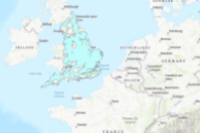

In [80]:
# Item Added From Toolbar
# Title: sssi_outside_np_aonb | Type: Feature Service | Owner: Adrian.Hughes@rspb.org.uk_RSPB
sssi_outside = gis.content.get("e00047cde6f145d0a6a681d85ef63961")
sssi_outside

In [87]:
table = sssi_outside.tables[0]
out_condition = SpatialDataFrame.from_layer(table)
#supress sci notation
pd.options.display.float_format = '{:.5f}'.format
out_condition.head()

,Join_ID,CONDITION,SUM_Area_SQUAREKILOMETERS,PercentArea,OBJECTID,NAME,Shape_Leng,Shape_Length,Shape_Area,SUM_Area_SQUAREKILOMETERS_1,Join_ID_1
0,1,,14.47675,0.01459,1,pb,10663181.17440,16321098.97997,99169124258.71049,3114.45049,1
1,1,DESTROYED,1.62359,0.00164,1,pb,10663181.17440,16321098.97997,99169124258.71049,3114.45049,1
2,1,FAVOURABLE,1242.27754,1.25204,1,pb,10663181.17440,16321098.97997,99169124258.71049,3114.45049,1
3,1,NOT ASSESSED,0.45704,0.00046,1,pb,10663181.17440,16321098.97997,99169124258.71049,3114.45049,1
4,1,PART DESTROYED,2.79399,0.00282,1,pb,10663181.17440,16321098.97997,99169124258.71049,3114.45049,1


In [88]:
out_condition['% Condition'] = (out_condition['SUM_Area_SQUAREKILOMETERS'] / out_condition['SUM_Area_SQUAREKILOMETERS_1']*100)
out_condition['Area Ha'] = (out_condition['SUM_Area_SQUAREKILOMETERS'] *100)
out_condition

,Join_ID,CONDITION,SUM_Area_SQUAREKILOMETERS,PercentArea,OBJECTID,NAME,Shape_Leng,Shape_Length,Shape_Area,SUM_Area_SQUAREKILOMETERS_1,Join_ID_1,% Condition,Area Ha
0,1,,14.47675,0.01459,1,pb,10663181.17440,16321098.97997,99169124258.71049,3114.45049,1,0.46483,1447.67492
1,1,DESTROYED,1.62359,0.00164,1,pb,10663181.17440,16321098.97997,99169124258.71049,3114.45049,1,0.05213,162.35862
2,1,FAVOURABLE,1242.27754,1.25204,1,pb,10663181.17440,16321098.97997,99169124258.71049,3114.45049,1,39.88754,124227.75425
3,1,NOT ASSESSED,0.45704,0.00046,1,pb,10663181.17440,16321098.97997,99169124258.71049,3114.45049,1,0.01467,45.70447
4,1,PART DESTROYED,2.79399,0.00282,1,pb,10663181.17440,16321098.97997,99169124258.71049,3114.45049,1,0.08971,279.39876
5,1,UNFAVOURABLE DECLINING,115.20444,0.11611,1,pb,10663181.17440,16321098.97997,99169124258.71049,3114.45049,1,3.69903,11520.44408
6,1,UNFAVOURABLE NO CHANGE,173.12430,0.17448,1,pb,10663181.17440,16321098.97997,99169124258.71049,3114.45049,1,5.55874,17312.42990
7,1,UNFAVOURABLE RECOVERING,1564.49284,1.57679,1,pb,10663181.17440,16321098.97997,99169124258.71049,3114.45049,1,50.23335,156449.28448


In [89]:
out_fav = out_condition.query('CONDITION == "FAVOURABLE"')
out_fav_final = out_fav[['NAME','Area Ha','% Condition']]
out_fav_final = out_fav_final.rename(columns = {'% Condition': '% Favourable'}, inplace = False)
out_fav_final.sort_values(by='NAME')

,NAME,Area Ha,% Favourable
2,pb,124227.75425,39.88754


### SSSI Condition outside of AONBs ###
tried to make code a bit more generic in termss of variable name to more easily transferable

In [3]:
arcpy.analysis.SummarizeWithin("England_Big_AOI_AONB_Erase", "Sites of Special Scientific Interest Condition Units (SSSI) England © Natural England", r"S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_Big_AOI_AONB_Erase_diss_SummarizeWithin", "KEEP_ALL", None, "ADD_SHAPE_SUM", "SQUAREKILOMETERS", "CONDITION", "NO_MIN_MAJ", "ADD_PERCENT", r"S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_big_AONB_SSSI_Condition_Summary")


id,value
0,S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_Big_AOI_AONB_Erase_diss_SummarizeWithin
1,S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_big_AONB_SSSI_Condition_Summary


In [4]:
features = "S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_Big_AOI_AONB_Erase_diss_SummarizeWithin"
sdf = SpatialDataFrame.from_featureclass(features)
sdf.head()

,OBJECTID,SUM_Area_SQUAREKILOMETERS,Join_ID,SHAPE
0,1,8377.552556,1,"{'hasZ': True, 'rings': [[[184771.99689999968,..."


In [5]:
sssi_con = r"S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_big_AONB_SSSI_Condition_Summary"
df = table_to_data_frame(sssi_con)
df.head()

,Join_ID,CONDITION,SUM_Area_SQUAREKILOMETERS,PercentArea
OBJECTID,,,,
1,1,,27.467042,0.010096
2,1,DESTROYED,1.810596,0.000666
3,1,FAVOURABLE,3356.476387,1.233778
4,1,NOT ASSESSED,0.457549,0.000168
5,1,PART DESTROYED,3.335613,0.001226


In [6]:
results_join = pd.merge(df,sdf,on='Join_ID')
results_join.head()

,Join_ID,CONDITION,SUM_Area_SQUAREKILOMETERS_x,PercentArea,OBJECTID,SUM_Area_SQUAREKILOMETERS_y,SHAPE
0,1,,27.467042,0.010096,1,8377.552556,"{'hasZ': True, 'rings': [[[184771.99689999968,..."
1,1,DESTROYED,1.810596,0.000666,1,8377.552556,"{'hasZ': True, 'rings': [[[184771.99689999968,..."
2,1,FAVOURABLE,3356.476387,1.233778,1,8377.552556,"{'hasZ': True, 'rings': [[[184771.99689999968,..."
3,1,NOT ASSESSED,0.457549,0.000168,1,8377.552556,"{'hasZ': True, 'rings': [[[184771.99689999968,..."
4,1,PART DESTROYED,3.335613,0.001226,1,8377.552556,"{'hasZ': True, 'rings': [[[184771.99689999968,..."


In [7]:
results_join['% Condition'] = (results_join['SUM_Area_SQUAREKILOMETERS_x'] / results_join['SUM_Area_SQUAREKILOMETERS_y']*100)
results_join['Area Ha'] = (results_join['SUM_Area_SQUAREKILOMETERS_x'] *100)
results_join[['CONDITION','SUM_Area_SQUAREKILOMETERS_x','SUM_Area_SQUAREKILOMETERS_y','Area Ha','% Condition']]
results_final = results_join.query('CONDITION == "FAVOURABLE"')
results_final = results_final.rename(columns = {'% Condition': '% Favourable'}, inplace = False)
results_final = results_final[['Area Ha','% Favourable']]
results_final


,Area Ha,% Favourable
2,335647.638743,40.065119


### SSSI Condition Outside National Parks ###

In [8]:
arcpy.analysis.SummarizeWithin("England_Big_AOI_NP_Erase", "Sites of Special Scientific Interest Condition Units (SSSI) England © Natural England", r"S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_Big_AOI_NP_Erase_SummarizeWithin", "KEEP_ALL", None, "ADD_SHAPE_SUM", "SQUAREKILOMETERS", "CONDITION", "NO_MIN_MAJ", "ADD_PERCENT", r"S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_big_NP_SSSI_Condition_Summary")


id,value
0,S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_Big_AOI_NP_Erase_SummarizeWithin
1,S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_big_NP_SSSI_Condition_Summary


In [9]:
features = "S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_Big_AOI_NP_Erase_SummarizeWithin"
sdf = SpatialDataFrame.from_featureclass(features)
sdf.head()

,OBJECTID,SUM_Area_SQUAREKILOMETERS,Join_ID,SHAPE
0,1,7918.010201,1,"{'hasZ': True, 'rings': [[[447425.5007999996, ..."


In [10]:
sssi_con = r"S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_big_NP_SSSI_Condition_Summary"
df = table_to_data_frame(sssi_con)
df.head()

,Join_ID,CONDITION,SUM_Area_SQUAREKILOMETERS,PercentArea
OBJECTID,,,,
1,1,,29.312298,0.010517
2,1,DESTROYED,1.816170,0.000652
3,1,FAVOURABLE,3452.943456,1.238893
4,1,NOT ASSESSED,0.457549,0.000164
5,1,PART DESTROYED,3.160465,0.001134


In [11]:
results_join = pd.merge(df,sdf,on='Join_ID')
results_join.head()

,Join_ID,CONDITION,SUM_Area_SQUAREKILOMETERS_x,PercentArea,OBJECTID,SUM_Area_SQUAREKILOMETERS_y,SHAPE
0,1,,29.312298,0.010517,1,7918.010201,"{'hasZ': True, 'rings': [[[447425.5007999996, ..."
1,1,DESTROYED,1.816170,0.000652,1,7918.010201,"{'hasZ': True, 'rings': [[[447425.5007999996, ..."
2,1,FAVOURABLE,3452.943456,1.238893,1,7918.010201,"{'hasZ': True, 'rings': [[[447425.5007999996, ..."
3,1,NOT ASSESSED,0.457549,0.000164,1,7918.010201,"{'hasZ': True, 'rings': [[[447425.5007999996, ..."
4,1,PART DESTROYED,3.160465,0.001134,1,7918.010201,"{'hasZ': True, 'rings': [[[447425.5007999996, ..."


In [12]:
results_join['% Condition'] = (results_join['SUM_Area_SQUAREKILOMETERS_x'] / results_join['SUM_Area_SQUAREKILOMETERS_y']*100)
results_join['Area Ha'] = (results_join['SUM_Area_SQUAREKILOMETERS_x'] *100)
results_join[['CONDITION','SUM_Area_SQUAREKILOMETERS_x','SUM_Area_SQUAREKILOMETERS_y','Area Ha','% Condition']]
results_final = results_join.query('CONDITION == "FAVOURABLE"')
results_final = results_final.rename(columns = {'% Condition': '% Favourable'}, inplace = False)
results_final = results_final[['Area Ha','% Favourable']]
results_final

,Area Ha,% Favourable
2,345294.345554,43.608727


### Upland Vision SSSI Condition

<Item title:"Uplands UK" type:Feature Layer Collection owner:maps_RSPB>
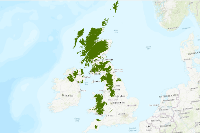

In [4]:
# Title: Uplands UK | Type: Feature Service | Owner: maps_RSPB
upland_vision = gis.content.get("52960fe791a1462fb859d9837e7fffa1")
upland_vision

In [4]:
arcpy.analysis.SummarizeWithin("Uplands_FromStoryMap", "Sites of Special Scientific Interest Condition Units (SSSI) England © Natural England", r"S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_SSSI_Upland_Vision_SummarizeWithin", "KEEP_ALL", None, "ADD_SHAPE_SUM", "SQUAREKILOMETERS", "CONDITION", "NO_MIN_MAJ", "ADD_PERCENT", r"S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_SSSI_Upland_Vision_Condition_Summary")

id,value
0,S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_SSSI_Upland_Vision_SummarizeWithin
1,S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_SSSI_Upland_Vision_Condition_Summary


In [8]:
features = "S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_SSSI_Upland_Vision_SummarizeWithin"
sdf = SpatialDataFrame.from_featureclass(features)
sdf.head()

,OBJECTID,ID,SUM_Area_SQUAREKILOMETERS,Join_ID,SHAPE
0,1,0,4184.117133,1,"{'rings': [[[111499.99399999995, 845499.997400..."
1,2,1,0.000000,2,"{'rings': [[[55106.32039999962, 509645.9230000..."
2,3,2,0.000000,3,"{'rings': [[[51337.01879999973, 541761.7473000..."
3,4,3,0.000000,4,"{'rings': [[[117668.12280000001, 578511.165799..."
4,5,4,0.000000,5,"{'rings': [[[95629.85900000017, 490857.9295000..."


In [9]:
sssi_con = r"S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_SSSI_Upland_Vision_Condition_Summary"
df = table_to_data_frame(sssi_con)
df.head()

,Join_ID,CONDITION,SUM_Area_SQUAREKILOMETERS,PercentArea
OBJECTID,,,,
1,1,,0.111068,0.000125
2,1,FAVOURABLE,743.246887,0.835676
3,1,PART DESTROYED,0.116393,0.000131
4,1,UNFAVOURABLE DECLINING,53.618122,0.060286
5,1,UNFAVOURABLE NO CHANGE,266.682201,0.299846


In [10]:
results_join = pd.merge(df,sdf,on='Join_ID')
results_join.head()

,Join_ID,CONDITION,SUM_Area_SQUAREKILOMETERS_x,PercentArea,OBJECTID,ID,SUM_Area_SQUAREKILOMETERS_y,SHAPE
0,1,,0.111068,0.000125,1,0,4184.117133,"{'rings': [[[111499.99399999995, 845499.997400..."
1,1,FAVOURABLE,743.246887,0.835676,1,0,4184.117133,"{'rings': [[[111499.99399999995, 845499.997400..."
2,1,PART DESTROYED,0.116393,0.000131,1,0,4184.117133,"{'rings': [[[111499.99399999995, 845499.997400..."
3,1,UNFAVOURABLE DECLINING,53.618122,0.060286,1,0,4184.117133,"{'rings': [[[111499.99399999995, 845499.997400..."
4,1,UNFAVOURABLE NO CHANGE,266.682201,0.299846,1,0,4184.117133,"{'rings': [[[111499.99399999995, 845499.997400..."


In [11]:
results_join['% Condition'] = (results_join['SUM_Area_SQUAREKILOMETERS_x'] / results_join['SUM_Area_SQUAREKILOMETERS_y']*100)
results_join['Area Ha'] = (results_join['SUM_Area_SQUAREKILOMETERS_x'] *100)
results_join[['CONDITION','SUM_Area_SQUAREKILOMETERS_x','SUM_Area_SQUAREKILOMETERS_y','Area Ha','% Condition']]
results_final = results_join.query('CONDITION == "FAVOURABLE"')
results_final = results_final.rename(columns = {'% Condition': '% Favourable'}, inplace = False)
results_final = results_final[['Area Ha','% Favourable']]
results_final

,Area Ha,% Favourable
1,74324.688747,17.76353


### Outside Upland Vision SSSI Condition ###

In [5]:
arcpy.analysis.SummarizeWithin("England_Big_AOI_UplandVision_Erase", "Sites of Special Scientific Interest Condition Units (SSSI) England © Natural England", r"S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_SSSI_Upland_Vision_Out_SummarizeWithin", "KEEP_ALL", None, "ADD_SHAPE_SUM", "SQUAREKILOMETERS", "CONDITION", "NO_MIN_MAJ", "ADD_PERCENT", r"S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_SSSI_Upland_Vision_Out_Condition_Summary")

id,value
0,S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_SSSI_Upland_Vision_Out_SummarizeWithin
1,S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_SSSI_Upland_Vision_Out_Condition_Summary


In [6]:
features = "S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_SSSI_Upland_Vision_Out_SummarizeWithin"
sdf = SpatialDataFrame.from_featureclass(features)
sdf.head()

,OBJECTID,SUM_Area_SQUAREKILOMETERS,Join_ID,SHAPE
0,1,6788.730256,1,"{'hasZ': True, 'rings': [[[276500.00009999983,..."


In [10]:
sssi_con = r"S:\DataUnit\DptShare\Consultancy\Lodge\Conservation and Policy\DavidHampson\Lost_Decade_PA_analysis\ArcGIS Pro\Protected_Area_Analysis_UK\Protected_Area_Analysis_UK.gdb\England_SSSI_Upland_Vision_Out_Condition_Summary"
df = table_to_data_frame(sssi_con)
df

,Join_ID,CONDITION,SUM_Area_SQUAREKILOMETERS,PercentArea
OBJECTID,,,,
1,1,,29.788595,0.011437
2,1,DESTROYED,1.898165,0.000729
3,1,FAVOURABLE,3451.325307,1.325101
4,1,NOT ASSESSED,0.457549,0.000176
5,1,PART DESTROYED,3.488890,0.001340
6,1,UNFAVOURABLE DECLINING,317.412216,0.121867
7,1,UNFAVOURABLE NO CHANGE,270.524824,0.103865
8,1,UNFAVOURABLE RECOVERING,2713.834710,1.041949


In [12]:
results_join = pd.merge(df,sdf,on='Join_ID')
results_join

,Join_ID,CONDITION,SUM_Area_SQUAREKILOMETERS_x,PercentArea,OBJECTID,SUM_Area_SQUAREKILOMETERS_y,SHAPE
0,1,,29.788595,0.011437,1,6788.730256,"{'hasZ': True, 'rings': [[[276500.00009999983,..."
1,1,DESTROYED,1.898165,0.000729,1,6788.730256,"{'hasZ': True, 'rings': [[[276500.00009999983,..."
2,1,FAVOURABLE,3451.325307,1.325101,1,6788.730256,"{'hasZ': True, 'rings': [[[276500.00009999983,..."
3,1,NOT ASSESSED,0.457549,0.000176,1,6788.730256,"{'hasZ': True, 'rings': [[[276500.00009999983,..."
4,1,PART DESTROYED,3.488890,0.001340,1,6788.730256,"{'hasZ': True, 'rings': [[[276500.00009999983,..."
5,1,UNFAVOURABLE DECLINING,317.412216,0.121867,1,6788.730256,"{'hasZ': True, 'rings': [[[276500.00009999983,..."
6,1,UNFAVOURABLE NO CHANGE,270.524824,0.103865,1,6788.730256,"{'hasZ': True, 'rings': [[[276500.00009999983,..."
7,1,UNFAVOURABLE RECOVERING,2713.834710,1.041949,1,6788.730256,"{'hasZ': True, 'rings': [[[276500.00009999983,..."


In [9]:
results_join['% Condition'] = (results_join['SUM_Area_SQUAREKILOMETERS_x'] / results_join['SUM_Area_SQUAREKILOMETERS_y']*100)
results_join['Area Ha'] = (results_join['SUM_Area_SQUAREKILOMETERS_x'] *100)
results_join[['CONDITION','SUM_Area_SQUAREKILOMETERS_x','SUM_Area_SQUAREKILOMETERS_y','Area Ha','% Condition']]
results_final = results_join.query('CONDITION == "FAVOURABLE"')
results_final = results_final.rename(columns = {'% Condition': '% Favourable'}, inplace = False)
results_final = results_final[['Area Ha','% Favourable']]
results_final

,Area Ha,% Favourable
2,345132.530714,50.83904
